<div id="instructions" style="border-radius: 5px; background-color:#f5f5f5;" >
<h1>Instructions</h1>
<p>Look for the <b>Your Turn</b> sections to complete the code and/or answer questions.<p>
</div>

# Lesson 3 Introduction to Probability


Now that you have learned a bit about counting and combinatorics, let's put this knowledge to use by computing some probabilities. 

## Probability for Dice

Let's start with some simple examples of computing probabilities for rolls of a pair of dice. Once we can use combinatorics to enumerate all possible states following a series of events, we can also compute probabilities of these events. 

Let's start by enumerating all of the possible end states from throwing two dice. We will assume that these dice are 'fair'.  In other words, there is an equal probability that any face of each dice will land pointing up. In terms of probability, we say that the distribution of scores for each dice follows a **Uniform Distribution**. further, we assume that the dice are identical and that the score for each dice is not dependent on the other dice. In the terminology of probability, we can now say that the score of each dice is **Independent Identically Distributed**, or **iid**.  

The code in the cell below computes as table with all possible outcomes. Run this code and examine the  results. 

In [1]:
from __future__ import division 

import numpy
import pandas
from matplotlib import pyplot
import seaborn

# Configure default plot style.
seaborn.set_palette('muted')
seaborn.set_style('ticks')
%matplotlib inline

In [2]:
import itertools
import pandas

%matplotlib inline

In [3]:
##-----Two Dice Example ------
two_dice = list(itertools.product(range(1, 7), range(1, 7)))
two_dice

[(1, 1),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (1, 6),
 (2, 1),
 (2, 2),
 (2, 3),
 (2, 4),
 (2, 5),
 (2, 6),
 (3, 1),
 (3, 2),
 (3, 3),
 (3, 4),
 (3, 5),
 (3, 6),
 (4, 1),
 (4, 2),
 (4, 3),
 (4, 4),
 (4, 5),
 (4, 6),
 (5, 1),
 (5, 2),
 (5, 3),
 (5, 4),
 (5, 5),
 (5, 6),
 (6, 1),
 (6, 2),
 (6, 3),
 (6, 4),
 (6, 5),
 (6, 6)]

As a first step in computing the probabilities, we need to find how many ways we can get into each state. In the case of the dice, how many ways can we roll each score (sum of the numbers shown on the upper sides of the two dice)? The figure below shows an example of the number of ways we can roll a 7 or a 10.

<img src="https://library.startlearninglabs.uw.edu/DATASCI410/img/Dice.jpg" style="height: 300px;" alt="Rolling dice image">

The code in the table below computes the score for each state in our table, as well as determining if the score is a result of a double. Execute this code and examine the results.

In [4]:
rolls = pandas.DataFrame(two_dice, columns=['dice1', 'dice2'])
rolls['sum'] = rolls.dice1 + rolls.dice2
rolls['is_double'] = rolls.dice1 == rolls.dice2
rolls

,dice1,dice2,sum,is_double
0,1,1,2,True
1,1,2,3,False
2,1,3,4,False
3,1,4,5,False
4,1,5,6,False
5,1,6,7,False
6,2,1,3,False
7,2,2,4,True
8,2,3,5,False
9,2,4,6,False


Next, we need to transform this table enumerating the states to a frequency table with the counts of states. Execute the code in the cell below to do just this.

In [5]:
# Count different sums
roll_sum_counts = rolls['sum'].value_counts()
roll_sum_counts

7     6
8     5
6     5
9     4
5     4
10    3
4     3
11    2
3     2
12    1
2     1
Name: sum, dtype: int64

In [6]:
roll_sum_counts.sum()

36

Examine this table. Which score is the most likely, and  which scores are least likely?

Finally, we can compute and plot the probabilities of the possible scores from rolling two dice. For situations where the outcomes are discrete states, the probability of each state is just the number of ways that the state can occur, divided by the total number of possible states. This is done to ensure the sum of all probabilities adds to 1.0. 

Execute the code in the cell below and examine the result. 

In [7]:
# Normalize the each roll value count by the total number of possible rolls.
roll_sum_probas = roll_sum_counts / roll_sum_counts.sum()
roll_sum_probas

7     0.166667
8     0.138889
6     0.138889
9     0.111111
5     0.111111
10    0.083333
4     0.083333
11    0.055556
3     0.055556
12    0.027778
2     0.027778
Name: sum, dtype: float64

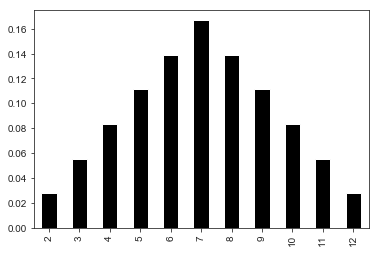

In [8]:
(roll_sum_probas).sort_index().plot(kind='bar', color='black')

Examine this result. Notice that the probabilities are proportional to the frequencies, but are scaled to ensure they add to 1.0.



***
### Your Turn:
Create and execute the code in the cell below to compute the probability of rolling a double. You can compute the **total number of doubles** from the `rolls` data frame and normalize by the **number of possible cases**.

In [9]:
rolls[rolls.loc[:, 'is_double']==True]

,dice1,dice2,sum,is_double
0,1,1,2,True
7,2,2,4,True
14,3,3,6,True
21,4,4,8,True
28,5,5,10,True
35,6,6,12,True


In [10]:
rolls[rolls.loc[:, 'is_double']==True].shape[0]

6

In [11]:
len(rolls)

36

In [12]:
double_proba = rolls[rolls.loc[:, 'is_double']==True].shape[0] / len(rolls) #fill in the blanks
double_proba

0.16666666666666666

## Basics of Probability

We will now investigate some basics of probability in a bit more detail.  

### Discrete Probability

A **discrete distribution** is a probability distribution describing a process with discrete outcomes. By discrete outcomes, we mean outcomes that have specific states which we can count. We have already investigated an example of a discrete process when we examined the outcome of dice throws. Each dice lands with a certain side up and the sum of the two numbers is the total score. 

For a discrete distribution, the probability of an event, A, is the number of ways A can occur, divided by the number of total possible outcomes in our Sample Space, S. Let's make this concrete with an example. In the figure below there are 10 events in S, 6 in set A, and 4 in set B.

<img src="https://library.startlearninglabs.uw.edu/DATASCI410/img/Prob1.png" style="height: 300px;" alt="Sample Space s">

The probability of the events in a subset, A, given a set of possible events in the sample space, S, can be computed as follows:

$$P(A) = \frac{N(A)}{N(S)}$$

In this case there are 10 events in S, 6 events in subset A, and 4 in subset B. We can compute the probabilities of A and B like this:

$$P(A) = \frac{6}{10} = \frac{3}{5} = 0.6\\
P(B) = \frac{4}{10} = \frac{2}{5} = 0.4$$

***
### Your Turn:
In the cell below find the probability that the score from a throw of a pair of dice will be less than or equal to 3. Hints: use filters on the `twoDice` data frame and the `nrow` function to get the counts. The `fractions` function will make your result easier to interpret.
***

In [13]:
rolls.head()

,dice1,dice2,sum,is_double
0,1,1,2,True
1,1,2,3,False
2,1,3,4,False
3,1,4,5,False
4,1,5,6,False


In [14]:
rolls[(rolls.loc[:, 'sum'] <= 3)]

,dice1,dice2,sum,is_double
0,1,1,2,True
1,1,2,3,False
6,2,1,3,False


In [15]:
le3_rolls = rolls[(rolls.loc[:, 'sum'] <= 3)]                               # fill in the space
le3_rolls

,dice1,dice2,sum,is_double
0,1,1,2,True
1,1,2,3,False
6,2,1,3,False


In [16]:
len(le3_rolls) / len(rolls)

0.08333333333333333

In [17]:
from fractions import Fraction
print(Fraction(len(le3_rolls), len(rolls)))

1/12


### Axioms of Probability

All probability distributions must have a certain properties, which we refer to as the **axioms of probability**. These are:
- Probability for any set, A, is bounded between 0 and 1:  
$$0 \le P(A) \le 1$$


- Probability of the Sample Space = 1:  
$$P(S) = \sum_{All\ i}P(a_i) = 1$$



- The probability of finite independent unions is the sum of their probabilities:
$$P(A \cup B) = P(A) + P(B)\\
if\ and\ only\ if\\
A \cap B = 0$$


***
### Your Turn:
In the cell below create and execute the code to show that $P(S) = 1$ for the simple set example we are using.
***

In [18]:
sum(rolls['sum'].value_counts()/len(rolls))

1.0000000000000002

### Set Operations and Probability

Set operations can be readily applied to probability problems. Continuing with our example, we can apply the following common set operations:

- **Intersection:** 
$$P(A \cap B)  = \frac{2}{10} = \frac{1}{5} = 0.2$$

- **Union:** 
$$P(A \cup B) = \frac{8}{10} = \frac{4}{5} = 0.8$$

- **Negation:** 
$$P(A)' = \frac{4}{10} = \frac{2}{5} = 0.4$$

You can use this basic operations to create more complex operations. For example:

$$P((A \cup B)') = P(A' \cap B') = P(C) = \frac{2}{10} = 0.2$$

We can also write an expression like the following:

$$P(A \cup B) = P(A) + P(B) - P(A \cap B)$$

### Independence vs. Mutual Exclusivity

In probability there are two concepts which are quite different but often confused: mutual exclusivity and independence.

Events in B are considered **independent** of events in A, if events in B have no effect on events in A. For independent events, we can write the following:

$$P(A \cap B) = 0\\
then\\
P(A \cup B) = P(A) + P(B)$$

If A and B are **mutually exclusive**, an event in B means that no identical event in A can occur at the same time and vice versa. For mutually exclusive events, we can write:

$$P(A \cap B) = 0 = Empty\ set\\
and\\
P(A \cup B) = P(A) + P(B)\\
because\ either\\
P(A) = 0\\
or\\
P(B) = 0
$$



***
### Your Turn:
Consider the diagram of event sub-sets in the figure below:

<img src="https://library.startlearninglabs.uw.edu/DATASCI410/img/ME.jpg" style="height: 300px;" alt="dIagram of sub-sets" > 

Write and execute the code to compute the following:
$$P(A \cup B)\\
P(A \cap B)\\
P((A \cup B)')$$
***

In [19]:
# fill in the space before the end of the parentheses
print('P Union = ',  6 / 10)
print('P Intersection = ', 0)
print('P NOT Union = ',  1 - (6 / 10))

P Union =  0.6
P Intersection =  0
P NOT Union =  0.4


### Conditional probability

**Conditional probability** is the probability that event A occurs given that event B has occurred. We can write conditional probability as follow, which we say is the probability of A given B:

$$P(A|B)$$

We can work out this conditional probability as follows:

$$P(A|B) = \frac{P(A \cap B)}{P(B)} = \frac{\frac{2}{10}}{\frac{4}{10}} = \frac{2}{4} = \frac{1}{2}$$

If event A is **independent** of B, then:

$$P(A|B) = P(A)$$

But, just because A is independent of B, it does not mean B is independent of A. Or, in terms of our notation:

$$P(A|B) = P(A)\\ does\ not\ imply\\ P(B|A) = P(B)$$

For example, the probability that your boss will approve your vacation request may be dependent on when she wishes to take vacation. However, it is unlikely that the probability of when your boss takes vacation is dependent on when you wish to take vacation. 

###  Conditional Probability Example

Let's try an example of using conditional probabilities to work out the chance of having a rare disease. The scenario is as follows:

1. Sickle Cell Anemia is a serious, but fairly rare disease.
 - $S \Rightarrow$ a patient has the disease. 
 - The probability that a given patient has the disease is $P(S) = \frac{1}{3200} = 0.0003125$.
 - $S' \Rightarrow$ a patient does not have the disease.
 - $\oplus \Rightarrow$ patient tests positive.
 - $- \Rightarrow$ a patient tests negative.
2. A medical company claims that its test is 99% accurate, giving:
  - $P(S |\oplus) = 0.99$
  - $P(S'|-) = 0.99$
  
On the surface, it seems that a 99% reliable test should be rather good. But, let's dig into the conditional probabilities and see how things really work out. 

The figure below shows a **conditional probability tree** for this problem. 

<img src="https://library.startlearninglabs.uw.edu/DATASCI410/img/CondTree.jpg" style="height: 300px;" alt="Probablity tree - conditional" >

If you follow the tree from the root you can visualize the computation of probabilities for each of the 4 possible outcomes of a test on a patient. Let's summarize the conditional probabilities we need to compute for these outcomes:

- $P(\oplus | S)$ is the conditional probability the test will correctly identify a patient with the disease. 
- $P(- | S)$; is the conditional probability of a negative test for a patient with the disease. We call this situation a **Type II Error** or **False Negative**.
-  $P(\oplus | S')$ is the conditional probability a patient with no disease will test positive. We call this situation a **Type I Error** or **False Positive**.
- $P(- | S')$; is the conditional probability of a negative test for a patient who does not have the disease.

Let's start with the easy cases. We know the probability of a patient having the disease and we know the accuracy of the test. In the code cell below, create and execute the code to compute the conditional probabilities of a positive test given the patient has the disease, and a negative test given the patient does not have the disease. 

In [20]:
pDisease = 0.0003125
pNotDisease = 1 - pDisease
pCorrect = 0.99
pError = 1 - pCorrect
pCorDisease = pDisease * pCorrect
pCorNotDisease = pNotDisease * pCorrect
(pCorDisease, pCorNotDisease)

(0.000309375, 0.9896906249999999)

So far, so good. Next, let's compute the conditional probabilities for the cases where our test is in error. In the code cell below, create and execute the code to compute the conditional probabilities of a negative test given that the patient has the disease, and a positive test given that the patient does not have the disease. Compare these results to the conditional probabilities you computed above. 

In [21]:
pErDisease = pError * pDisease
pErNotDisease = pError * pNotDisease
(pErDisease, pErNotDisease)

(3.1250000000000027e-06, 0.00999687500000001)

Given these results, do you think this test is actually useful? Why?

You can visualize the summary of these results in the figure below. 

<img src="https://library.startlearninglabs.uw.edu/DATASCI410/img/CondTreeProbs.jpg" style="height: 300px;" alt="More conditional probability tree">

Let's do one final check. In the cell below, create and execute the code to compute the sum of the probabilities of all the possible outcomes. Does the sum equal 1.0? 

In [22]:
pCorDisease + pCorNotDisease + pErDisease + pErNotDisease

0.9999999999999999

## Odds

**Odds** are the ration of the number of ways an event can occur to the number of ways it cannot occur. Sometimes we say that **odds** are the count of events in favor of an event vs. the count against the event. 

For example, if you flip a fair coin the odds of getting heads are $1:1$ (1 in 1). Since there are only two possible equally likely outcomes in the coin flip, we say the odds of the outcome are even. As another example, if you roll a single fair dice your odds of rolling a 6 are $1:6$ (1 in 6), or 0.167. 

It is natural to ask, what is the relationship between odds and probability of an event? We can work this out for some event with count $A$ in a set of all outcomes with count $S$, and where the count of negative outcomes $B = S - A$, as follows:

$$P(A) = \frac{A}{S} = \frac{A}{A + (S - A)} = \frac{A}{A + B} = \frac{count\ in\ favor}{count\ in\ favor\ + count\ not\ in\ favor}\\
which\ implies\\
odds = A:(S-A)$$

Let's say that for the fair coin flip, the odds are $1:1$. So we can compute the probability of heads as:

$$P(H) = \frac{1}{1 + 1} = \frac{1}{2}$$

***
### Your Turn
Answer the following questions:
1. We have said that the odds of rolling a 6 when throwing a single fair die are 1:6. What is the probability of rolling a 3? ANS: P(3) = 1/6
2. What are the odds and probability of rolling a total of 7 when throwing two fair dice? ANS: Odds(sum=7) = 6/30 = 1/5
***

In [39]:
# Probability of rolling a total of 7 when throwing two fair dice
inFavor = len(rolls[(rolls.loc[:, 'sum'] == 7)])
totalCount = len(rolls)
print(Fraction(inFavor, totalCount))
# Odds
odds = Fraction(inFavor, totalCount - inFavor)
print("{}:{}".format(odds.numerator, odds.denominator))

1/6
1:5


## Conditional Probability and the Monty Hall Problem
The long running television game show, *Let's Make A Deal*, created and hosted by *Monty Hall*, had its heyday in the 1970s. At the finale of a show, Monty would tell the winning contestant that she could pick a one of three doors. Behind one door there would be a valuable prize, like a car. Worthless items, like a goat, were placed behind the other two doors. The contestant would pick a door. At this point Monty would build suspense by opening one of the other doors. Monty knew which door had the valuable prize, and would always reveal one of the worthless prizes. He would then tell the contestant that they could change their choice of doors. The question then is, should the contestant switch or stick with their original choice? The figure below illustrates the situation the contestant faces if they pick Door 1:

<img src="https://library.startlearninglabs.uw.edu/DATASCI410/img/Doors.jpg" style="height: 300px;" alt="Doors and a goat">

In 1975, Steve Selvin published a letter in the *American Statistician* posing the problem of which strategy is optimal. The resulting debate created considerable controversy. This debate was put at full boil when Marilyn vos Savant wrote in her *Ask Marilyn* column in *Parade* magazine that the contestant should definitely switch. She was then ridiculed by several statisticians. 

What would you do if you were the contestant? Fortunately for you, you know something about conditional probabilities. 

Your first choice, from the three doors, is purely random, since only Monty knows which door hides the car. You can compute the conditional probabilities of winning the car as follows.

-  There is a probability of 2/3 that your initial pick will be one of the two doors with a goat.
  * At this point, with probability 1 Monty will open the door with the other goat, since he cannot reveal the location of the car.  
  * If you switch door choices at this point you will win the car with probability 2/3, or;
  $$P(win\ car\ with\ switch\ |\ picked\ goat\ initially) = 1.0 * \frac{2}{3} = \frac{2}{3}$$
  * However, if you do not switch, you will have 0 probability of winning the car, or:
  $$P(win\ car\ no\ switch\ |\ picked\ goat\ initially) = 0.0 * \frac{2}{3} = 0.0$$
-  There is a probability of 1/3 that your initial pick will be the only door with the car. 
  * At this point, with probability 1/2 Monty can open either of the other doors, as they both contain goats.  
  * If you switch door choices at this point you will win the car with probability 0, or;
  $$P(win\ car\ with\ switch\ |\ picked\ car\ initially) = 0.0 * \frac{1}{3} = 0$$
  * However, if you do not switch, you will have probability 1/3 of winning the car, or:
  $$P(win\ car\ no\ switch\ |\ picked\ car\ initially) = 1.0 * \frac{1}{3} = \frac{1}{3}$$

Summing up the probabilities you can see that you should always switch your door choice, since:

$$
P(win\ car\ | switch) = \frac{2}{3} + 0 = \frac{2}{3}\\
whereas\\
P(win\ car\ | no\ switch) = \frac{1}{3} + 0 = \frac{1}{3}\\
$$

The diagram below expands the paths you can take in this contest, and shows the conditional probabilities at each step. 

<img src="https://library.startlearninglabs.uw.edu/DATASCI410/img/Choices.jpg" style="height: 300px;" alt="Contest paths"  >

The Monty Hall problem has been published in several forms. You can find more on the Monty Hall problem in the [Wikipedia article](https://en.wikipedia.org/wiki/Monty_Hall_problem).

## Summary

In this notebook you have learned about some basic properties of discrete probabilities. Specifically:

- Computing probabilities by summing events in a set A and normalizing the the total possible events in the sample space S.
- Understand the axiom's probability.
- Use set operations on probabilities.
- Compute probabilities for independent and mutually exclusive events.
- Apply conditional probabilities. 

<div id="reminder" style="border-radius: 5px; background-color:#f5f5f5;" >
<h3>Reminder</h3>
<p>Use this notebook to answer the quiz questions related to the <b>Your Turn</b> sections.<p>
</div>